In [123]:
library(Seurat)

In [2]:
library(Matrix)

In [19]:
koh.data.counts=readMM('data/koh_extract/koh.data.counts.mm')

In [27]:
koh.data.row=c(read.table('data/koh_extract/koh.data.row'))$V1
koh.data.col=c(read.table('data/koh_extract/koh.data.col'))$V1

In [28]:
koh.data=as.matrix(koh.data.counts)
rownames(koh.data)=koh.data.row
colnames(koh.data)=koh.data.col

In [167]:
koh=CreateSeuratObject(counts = koh.data, project = "koh", min.cells = 0, min.features = 0)

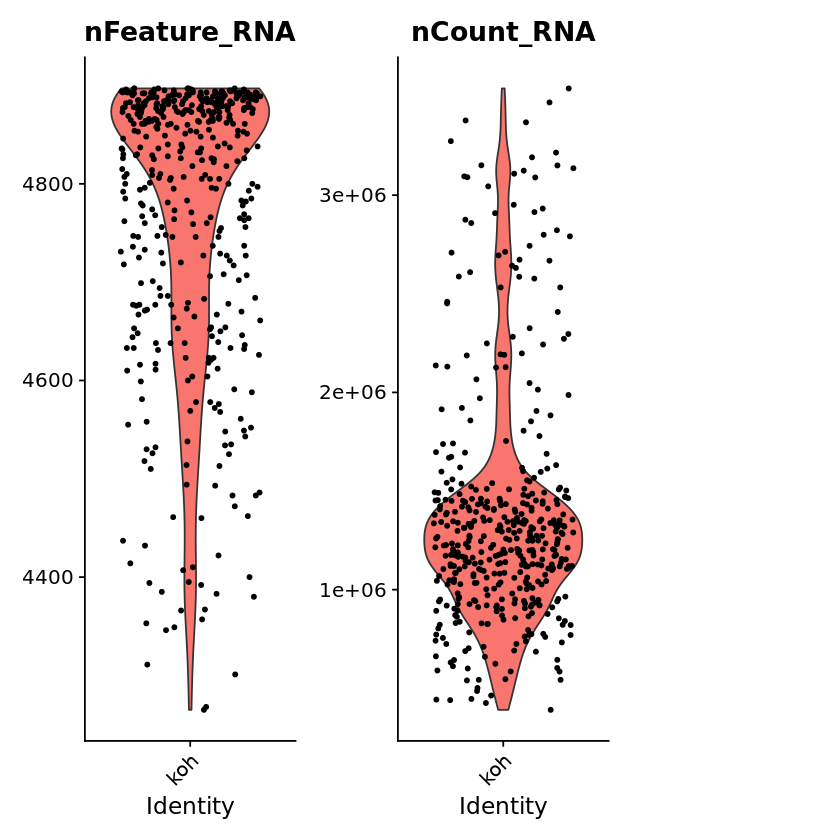

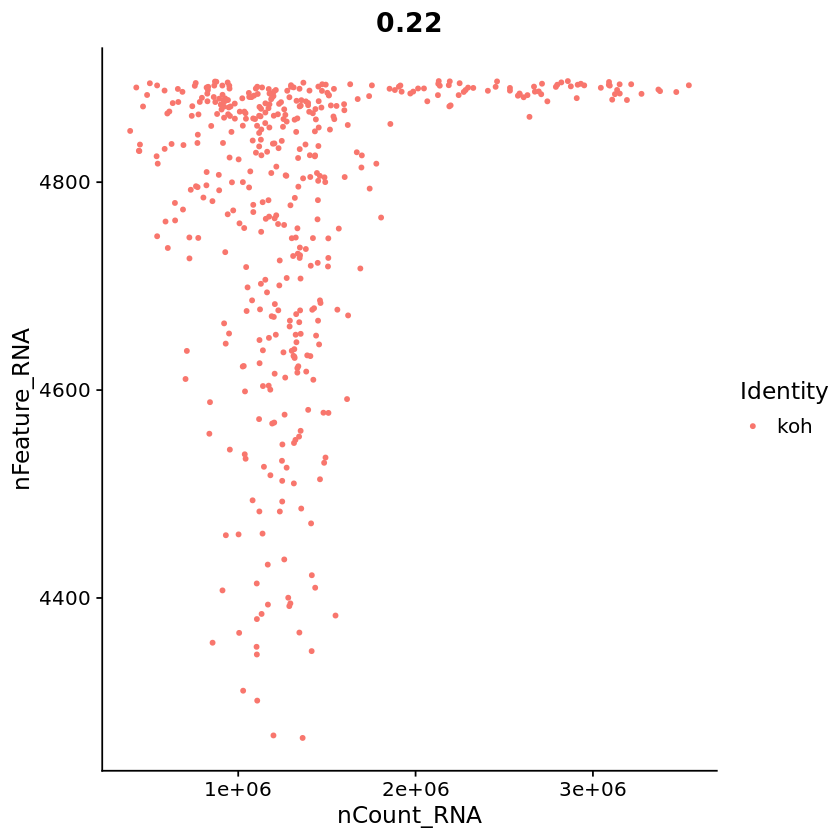

In [173]:
VlnPlot(koh, features = c("nFeature_RNA", "nCount_RNA"), ncol = 3)
FeatureScatter(koh, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

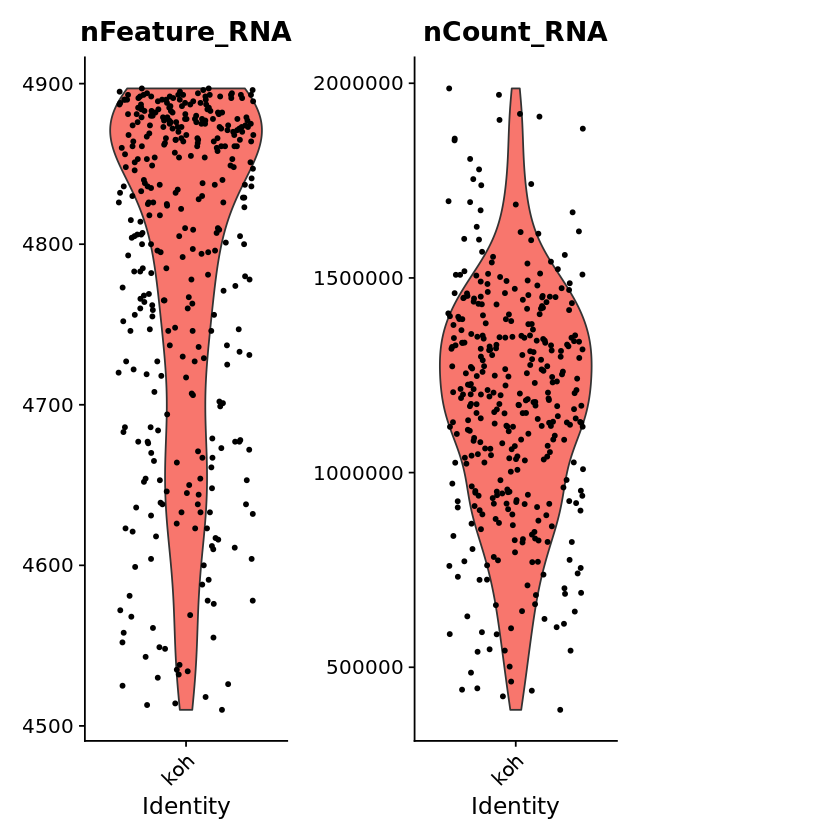

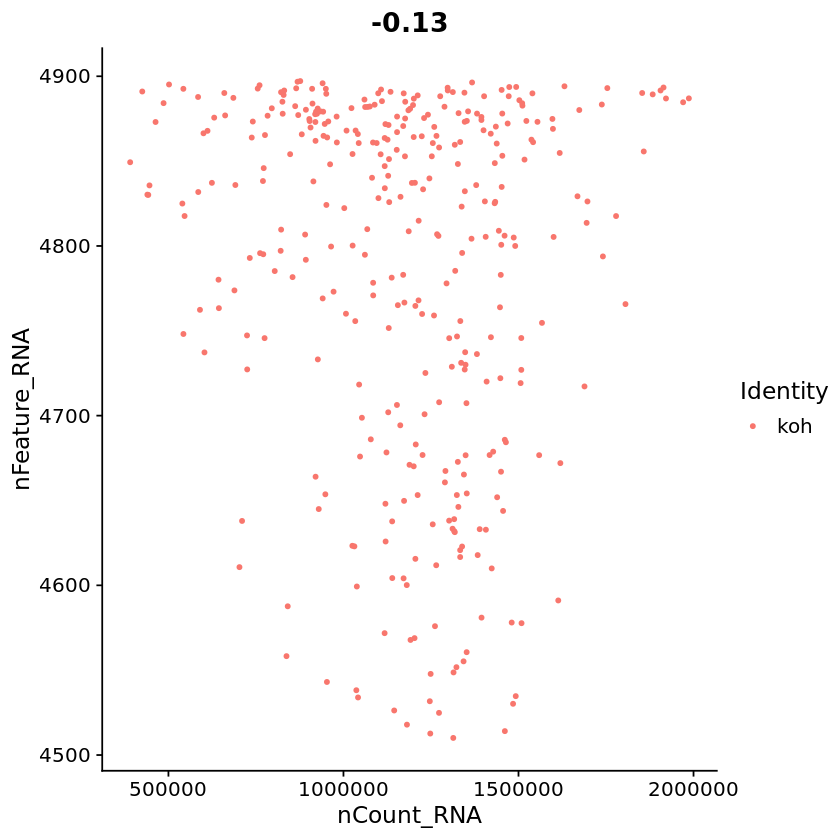

In [175]:
koh_norm <- subset(koh, subset = nFeature_RNA > 4500 & nCount_RNA < 2000000)
koh_norm <- NormalizeData(koh_norm, normalization.method = "LogNormalize", scale.factor = 10000)
#koh_norm@assays$RNA@data
VlnPlot(koh_norm, features = c("nFeature_RNA", "nCount_RNA"), ncol = 3)
FeatureScatter(koh_norm, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [161]:
FindVariableFeatures(koh_norm, selection.method = "mvp",verbose=TRUE)# nfeatures = length(rownames(koh@assays$RNA)))

An object of class Seurat 
4898 features across 446 samples within 1 assay 
Active assay: RNA (4898 features, 679 variable features)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


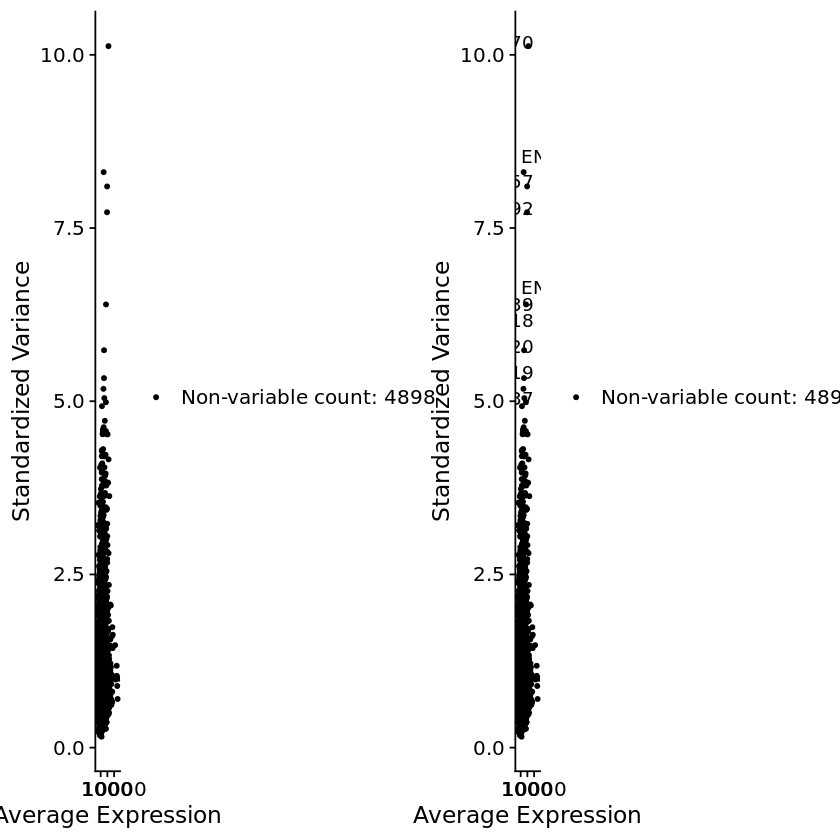

In [162]:
koh=FindVariableFeatures(koh, selection.method = "vst", nfeatures = length(rownames(koh@assays$RNA)))
koh_vst=VariableFeatures(koh)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(koh)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
write.table(koh_vst,'koh_vst.tsv',row.names=FALSE,col.names=FALSE,sep='\t')

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


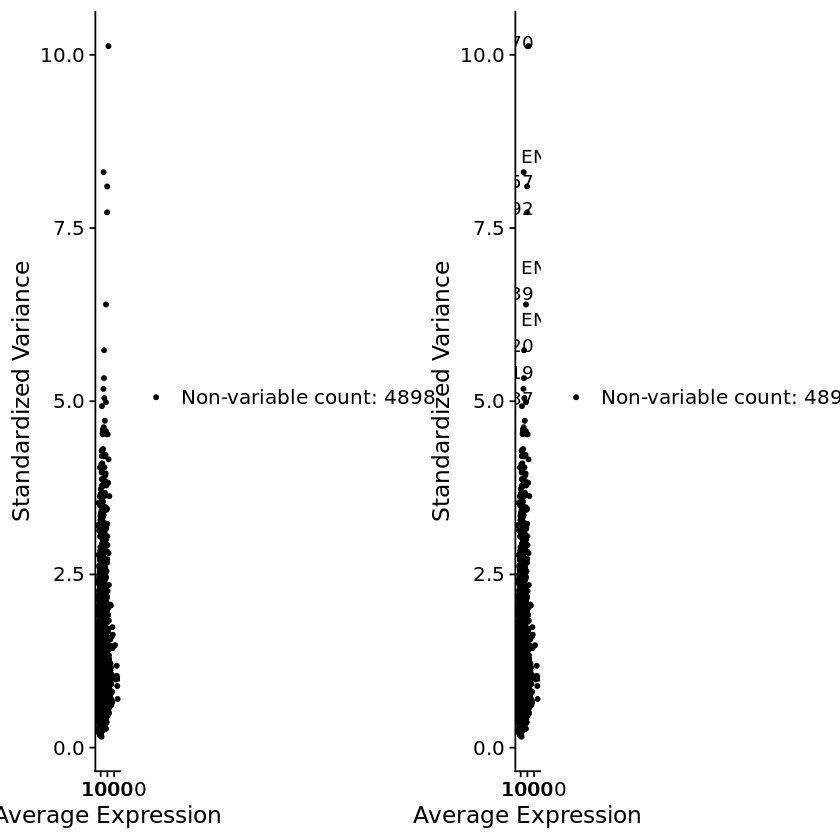

In [163]:
koh_norm=FindVariableFeatures(koh_norm, selection.method = "vst", nfeatures = length(rownames(koh@assays$RNA)))
koh_norm_vst=VariableFeatures(koh_norm)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(koh_norm)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
write.table(koh_norm_vst,'koh_norm_vst.tsv',row.names=FALSE,col.names=FALSE,sep='\t')

In [172]:
koh_norm=FindVariableFeatures(koh_norm, selection.method = "dispersion", nfeatures = length(rownames(koh@assays$RNA)))
koh_norm_disp=VariableFeatures(koh_norm)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(koh_norm)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
write.table(koh_norm_disp,'koh_norm_disp.tsv',row.names=FALSE,col.names=FALSE,sep='\t')

ERROR: Error in FindVariableFeatures(koh_norm, selection.method = "dispersion", : 객체 'koh_norm'를 찾을 수 없습니다


When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


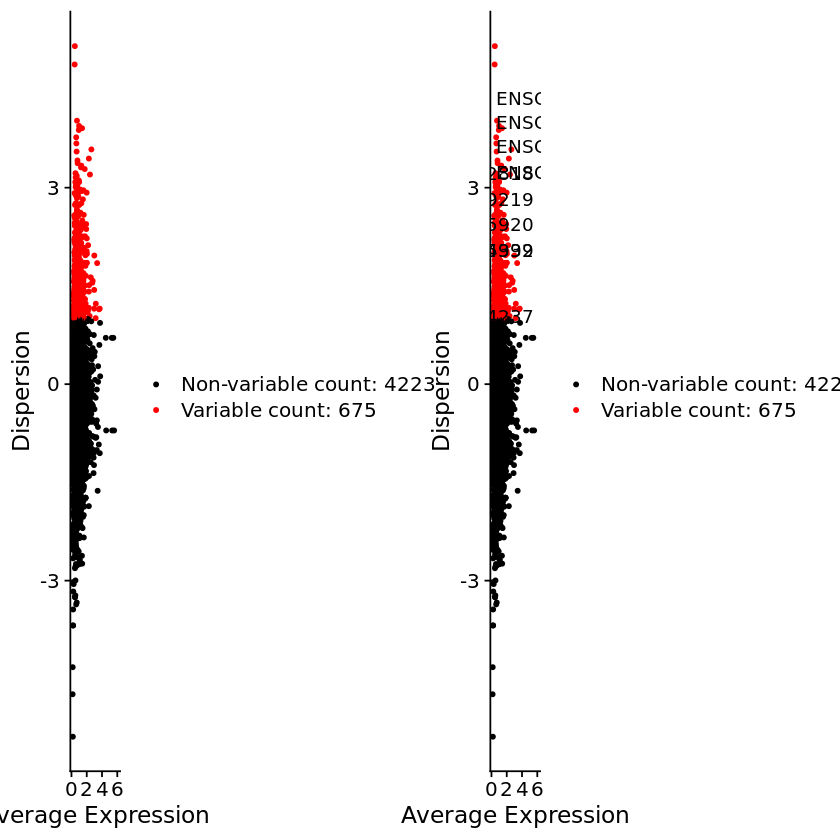

In [176]:
koh_norm=FindVariableFeatures(koh_norm, selection.method = "mvp", nfeatures = length(rownames(koh@assays$RNA)))
koh_norm_mvp=VariableFeatures(koh_norm)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(koh_norm)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
write.table(koh_norm_mvp,'koh_norm_mvp.tsv',row.names=FALSE,col.names=FALSE,sep='\t')

In [85]:
koh_norm@assays

$RNA
Assay data with 4898 features for 446 cells
Top 10 variable features:
 ENSG00000185070, ENSG00000280623, ENSG00000155657, ENSG00000265992,
ENSG00000060237, ENSG00000254339, ENSG00000152818, ENSG00000185920,
ENSG00000139219, ENSG00000154237 


In [86]:
koh@assays

$RNA
Assay data with 4898 features for 446 cells
Top 10 variable features:
 ENSG00000185070, ENSG00000280623, ENSG00000155657, ENSG00000265992,
ENSG00000060237, ENSG00000254339, ENSG00000152818, ENSG00000185920,
ENSG00000139219, ENSG00000154237 


In [82]:
#help(FindVariableFeatures)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


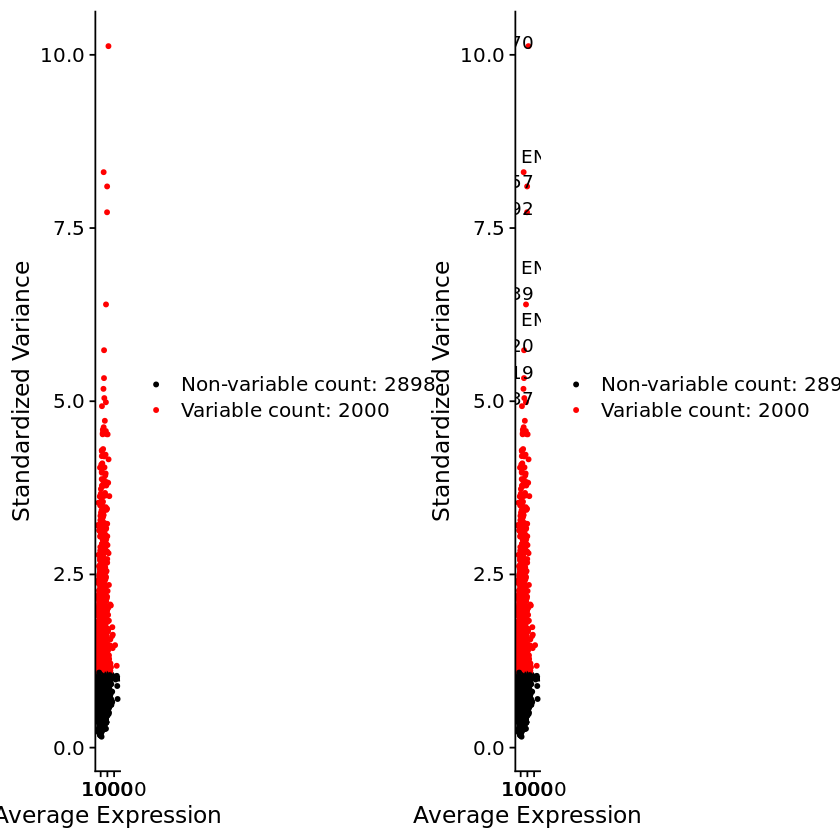

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


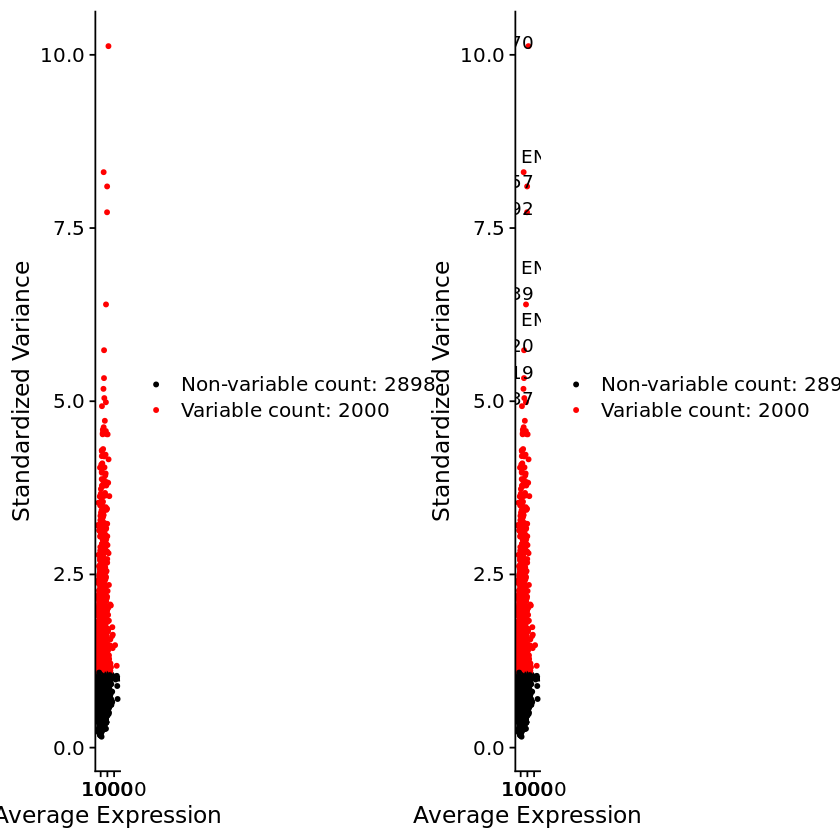

In [84]:
koh_norm=FindVariableFeatures(koh_norm, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(koh_norm), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(koh_norm)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))

In [51]:
koh

An object of class Seurat 
4898 features across 446 samples within 1 assay 
Active assay: RNA (4898 features, 2000 variable features)

In [32]:
slotNames(koh)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "project.name" "misc"         "version"     
[11] "commands"     "tools"

In [37]:
#koh@meta.data#koh@assays

In [ ]:
writeMM(save_data,"data/koh_extract/koh.data.counts.mm")

In [ ]:
- CreateSeuratObject(counts = pbmc.data, project = "koh")